Import the libraries

In [35]:
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

Generate Data

In [36]:
observation = 1000
xs = np.random.uniform(low = -10, high = 10, size = (observation, 1)) 
zs = np.random.uniform(-10, 10, (observation, 1))
generated_inputs = np.column_stack((xs,zs))
noise = np.random.uniform(-1, 1, (observation, 1))
generated_targets = (2 * xs) - (3 * zs) + 5 + noise
np.savez('TF_intro', inputs = generated_inputs, targets = generated_targets)


Solving with Tensorflow

In [37]:
training_data = np.load('TF_intro.npz')
input_size = 2
output_size = 1
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])
# keras.Sequential() function that specifies how the model will be laid down('stack layers')
# keras.layers.Dense(output size) takes the inputs provided to the model and calculates the 
# dot product of the inputs and the weights and adds the bias 
# *also applies to the activation function (optional)

model. compile(optimizer = 'sgd', loss = 'mean_squared_error')
# model.compile(optimizer, loss) configures the model for training

model.fit(training_data['inputs'], training_data['targets'], epochs = 250, verbose = 0)
# model.fit(inputs,targets) fits(trains) the model, epochs = iteration over the full dataset
# verbose 0 for silent, 1 for progressbar and 2 for one line

Extract the weights and bias

In [38]:
model.layers[0].get_weights()

[array([[ 1.987761 ],
        [-2.9935822]], dtype=float32), array([4.961603], dtype=float32)]

In [39]:
weights = model.layers[0].get_weights()[0]
weights


array([[ 1.987761 ],
       [-2.9935822]], dtype=float32)

In [40]:
bias = model.layers[0].get_weights()[1]
bias

array([4.961603], dtype=float32)

In [44]:
model.predict_on_batch(training_data['inputs'])

<tf.Tensor: id=139680, shape=(1000, 1), dtype=float32, numpy=
array([[-3.41876984e+01],
       [-8.27841377e+00],
       [-8.00436878e+00],
       [ 1.02300434e+01],
       [-2.41811047e+01],
       [ 1.29374046e+01],
       [-4.48943806e+00],
       [ 2.25379238e+01],
       [-1.75544186e+01],
       [ 2.75269680e+01],
       [-1.84876480e+01],
       [-9.96860027e+00],
       [ 3.64615364e+01],
       [ 3.97254944e+00],
       [ 3.47146912e+01],
       [-3.10355434e+01],
       [-1.63685780e+01],
       [ 4.83572159e+01],
       [-1.19010925e+00],
       [-2.82115936e-01],
       [ 3.04754314e+01],
       [ 3.63268089e+00],
       [ 2.57644215e+01],
       [ 6.51857948e+00],
       [ 1.45322151e+01],
       [-3.64409637e+01],
       [-2.15084190e+01],
       [-1.02963524e+01],
       [ 3.14021339e+01],
       [ 2.75727425e+01],
       [ 3.89854584e+01],
       [ 9.09926033e+00],
       [-6.42426491e+00],
       [ 3.55253220e+01],
       [ 2.33295593e+01],
       [ 3.06941051e+01],
  

In [45]:
training_data['targets']

array([[-3.34033946e+01],
       [-8.93010339e+00],
       [-7.91207109e+00],
       [ 1.03494577e+01],
       [-2.32252925e+01],
       [ 1.27575395e+01],
       [-5.15149862e+00],
       [ 2.32037194e+01],
       [-1.68650532e+01],
       [ 2.82551089e+01],
       [-1.86323724e+01],
       [-9.31662711e+00],
       [ 3.60506551e+01],
       [ 4.43338041e+00],
       [ 3.51429003e+01],
       [-3.12751363e+01],
       [-1.72167166e+01],
       [ 4.87778950e+01],
       [-5.34136567e-01],
       [-4.21076315e-01],
       [ 3.03220121e+01],
       [ 4.58110359e+00],
       [ 2.64748270e+01],
       [ 7.28465476e+00],
       [ 1.41075840e+01],
       [-3.56942592e+01],
       [-2.21855992e+01],
       [-1.08992150e+01],
       [ 3.07440635e+01],
       [ 2.68068387e+01],
       [ 4.00192755e+01],
       [ 9.45302914e+00],
       [-5.34741343e+00],
       [ 3.60274605e+01],
       [ 2.35145034e+01],
       [ 3.08672842e+01],
       [ 3.77790894e+00],
       [-2.53049364e+01],
       [ 2.1

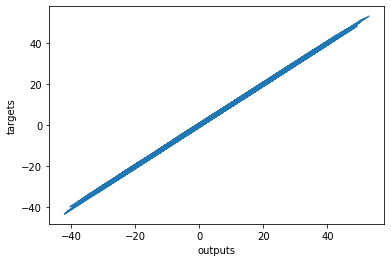

In [47]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), \
         np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()